In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sbs

In [3]:
sbs.set_theme()

# %matplotlib qt
%matplotlib inline
df = pd.read_csv("diabetes.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [ ]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan) # Changed np.NaN to np.nan
hist_plot = df.hist(bins=50, figsize=(20,15)) # Assign the result of df.hist to a variable named 'hist_plot'

<Axes: >

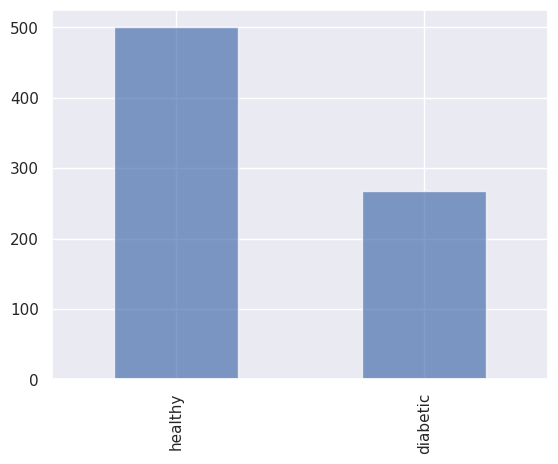

In [ ]:
Healthy = df[df['Outcome'] == 0]
Diabetic = df[df['Outcome'] == 1]

h_diab = pd.Series({'healthy':Healthy.shape[0], 'diabetic':Diabetic.shape[0]})
h_diab.plot.bar(alpha=0.7)

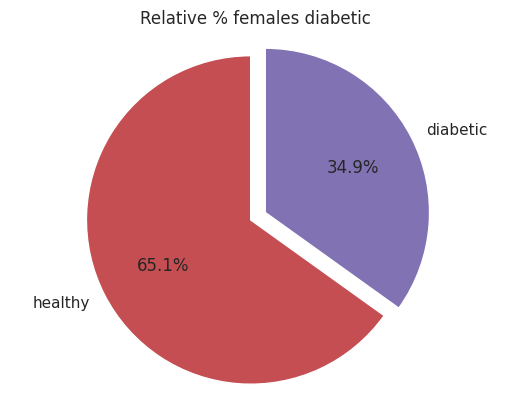

In [ ]:
h_diab.plot.pie(startangle=90, explode=[0,0.1], autopct='%1.1f%%', colors=['C3', 'C4'])
plt.title('Relative % females diabetic ')
plt.ylabel('')
_ = plt.axis('equal')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

x = df.drop('Outcome', axis=1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

param_grid = {'n_estimators': [400, 500, 600],
              'max_leaf_nodes': [14, 15, 16]}
random_forest = RandomForestClassifier(n_jobs=-1)

grid_search_rf = GridSearchCV(random_forest, param_grid=param_grid, cv=3, scoring='recall', return_train_score=True)
grid_search_rf.fit(x_train, y_train)
grid_search_rf.best_params_

{'max_leaf_nodes': 15, 'n_estimators': 600}

In [ ]:
from sklearn.metrics import classification_report, recall_score, roc_auc_score

print(classification_report(y_test, grid_search_rf.predict(x_test)))
print(recall_score(y_test, grid_search_rf.predict(x_test)))
print(roc_auc_score(y_test, grid_search_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

0.6363636363636364
0.7222222222222221


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor # Make sure to import RandomForestRegressor here as well
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load & prepare Data
# -----------------------------

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Target')

print(f'Dataset shape: {x.shape}')
print("\nfirst 5 Rows: ")
print(x.head())
print("\nfirst 5 Rows: ")
print(y.head())
# -----------------------------
# 2. preprocessing
# -----------------------------

x.fillna(x.mean(), inplace=True)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# -----------------------------
# 3. Train Base Model
# -----------------------------
rf = RandomForestRegressor(random_state=42) # Now RandomForestRegressor should be defined
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print("\nBase Model Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R2 score: {r2_score(y_test, y_pred):.4f}")

# -----------------------------
# 4. Hyperparameter Tuning (GridSearchCV)
# -----------------------------
param_grid = {
    'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

print("\nBest Parameter:", grid_search.best_params_)

# -----------------------------
# 5. Evaluate Optimized Model
# -----------------------------

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(x_test)

print("\nTuned Model Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.4f}")
print(f"R2 score: {r2_score(y_test, y_pred_best):.4f}")

Dataset shape: (20640, 8)

first 5 Rows: 
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

first 5 Rows: 
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64

Base Model Performance:
RMSE: 0.5055
R2 score: 0.8050
Fitting 5 folds for each of 81 candidates, totalling 405 fits
